In [1]:
from pandas import read_csv 
import numpy as np

In [2]:
df = read_csv('international-airline-passengers.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]
print(train.shape)
print(test.shape)

(96, 1)
(48, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [6]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    print(x.shape)
    print(y.shape)
    return np.array(dataX), np.array(dataY)

In [7]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape, trainY.shape,testX.shape, testY.shape

(12,)
()
(12,)
()


((84, 12), (84,), (36, 12), (36,))

In [8]:
#testY.reshape((36,1))


trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX[0]

In [10]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

C:\Users\priya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
from keras import optimizers

RMSProp optimizer
It is recommended to leave the parameters of this optimizer at their default values (except the learning rate, which can be freely tuned).
This optimizer is usually a good choice for recurrent neural networks.

In [57]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
rms=optimizers.RMSprop(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=rms)
model.fit(trainX, trainY, epochs=15, batch_size = 1)

Epoch 1/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0169
Epoch 2/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 3/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 4/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 5/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 6/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 7/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 8/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 9/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 10/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 11/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 12/15
84/84 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 13/15
84/84 [==============================

In [59]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

# testTrue = scaler.inverse_transform(testY.reshape(36,1)).ravel()
# trainTrue = scaler.inverse_transform(trainY.reshape(84,1)).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

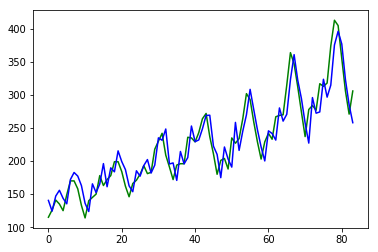

In [60]:
from matplotlib import pyplot as plt
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

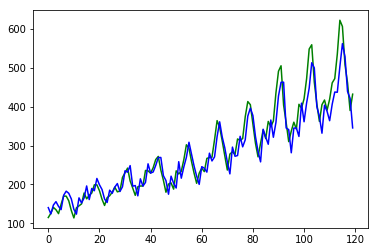

In [61]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()